<a href="https://colab.research.google.com/github/Sandermi99/MEDT4165/blob/main/Exercise1_SPUltrasound.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Importing libraries
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as signal



500


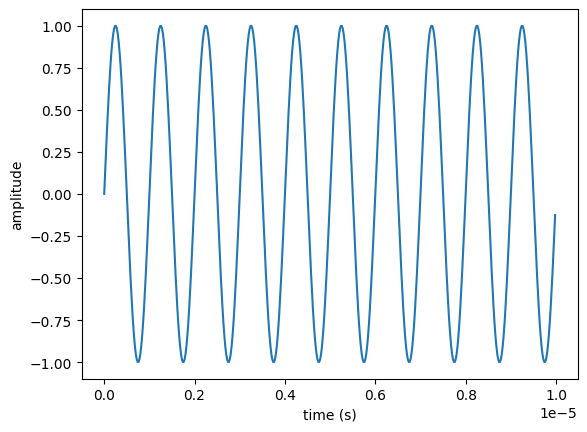

In [36]:
#Signal generation and plotting

f0 = 1e6
fc = 50e6
tstart = 0
tstop = 10e-6
N = int(fc*tstop)
t = np.arange(N)/fc
y = np.sin(2*np.pi*f0*t)
print(N)
plt.xlabel("time (s)")
plt.ylabel("amplitude")
plt.plot(t, y)
plt.show()

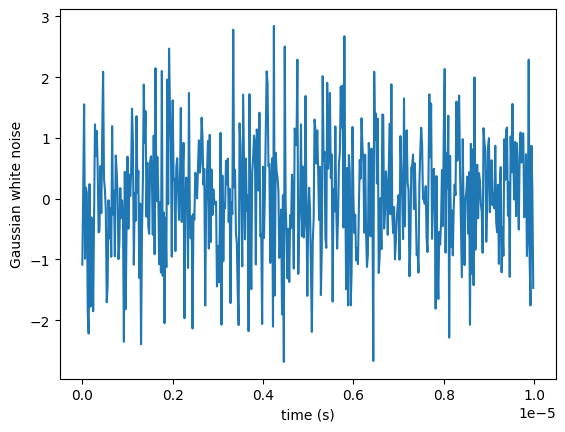

In [37]:
#generating noise

n = np.random.normal(0, 1, N)
plt.xlabel("time (s)")
plt.ylabel("Gaussian white noise")
plt.plot(t, n)
plt.show()

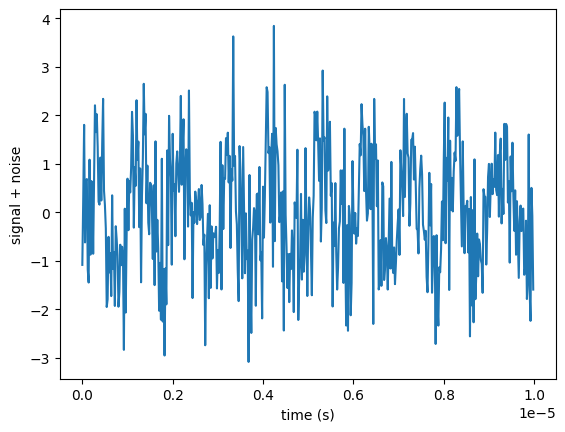

In [38]:
#Adding noise and signal

y_noisy = y + n
plt.xlabel("time (s)")
plt.ylabel("signal + noise")
plt.plot(t, y_noisy)
plt.show()

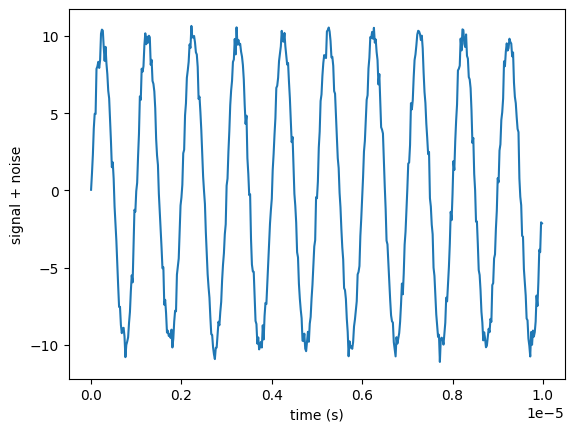

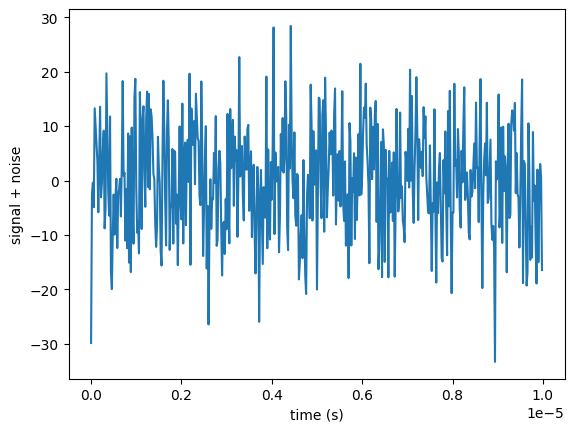

In [61]:
#Scenarios with either noise dominace or signal dominance
#a high SNR
sig_amp_high = 10
noise_amp_low = 0.5
n_scen_a = np.random.normal(0, noise_amp_low, N)

y_dominant = sig_amp_high*y + n_scen_a
plt.xlabel("time (s)")
plt.ylabel("signal + noise")
plt.plot(t, y_dominant)
plt.show()

#b low SNR
sig_amp_low = 5
noise_amp_high = 10
n_scen_b = np.random.normal(0, noise_amp_high, N)
y_notdominant = sig_amp_low*y + n_scen_b
plt.xlabel("time (s)")
plt.ylabel("signal + noise")
plt.plot(t, y_notdominant)
plt.show()






In [62]:
#Calculating the signal-to-noise ratio (SNR)

SNR_est_a = np.mean((sig_amp_high*y)**2)/np.mean(noise_amp_low**2)
SNR_est_b = np.mean((sig_amp_low*y)**2)/np.mean(noise_amp_high**2)
SNR_est_a_dB = 10*np.log10(SNR_est_a)
SNR_est_b_dB = 10*np.log10(SNR_est_b)
print(SNR_est_a_dB)
print(SNR_est_b_dB)

23.010299956639813
-9.030899869919436


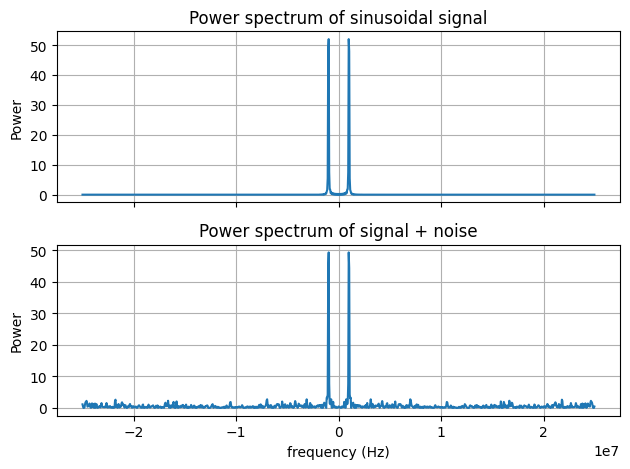

In [63]:
#Power spectrum (frequency) analysis
Nfft = 1024
Y_noisy = np.fft.fft(y_noisy, Nfft)
Y_dominant = np.fft.fft(y, Nfft)

Ps_noisy = (1/Nfft)*np.abs(Y_noisy)**2
Ps_dominant = (1/Nfft)*np.abs(Y_dominant)**2
Pshiftet_noisy = np.fft.fftshift(Ps_noisy)
Pshiftet_dominant = np.fft.fftshift(Ps_dominant)
f = np.fft.fftshift(np.fft.fftfreq(Nfft, 1/fc))
fig, ax = plt.subplots(2,1,sharex=True)

ax[0].plot(f, Pshiftet_dominant)
ax[0].set_title("Power spectrum of sinusoidal signal")
ax[0].set_ylabel("Power")
ax[0].grid()

ax[1].plot(f, Pshiftet_noisy)
ax[1].set_title("Power spectrum of signal + noise")
ax[1].set_xlabel("frequency (Hz)")
ax[1].set_ylabel("Power")
ax[1].grid()

plt.tight_layout()
plt.show()


#Interpretation:
# We can see that the power spectrum of the sinusoidal signal has two distinct peaks at
# +-f0 with no leakage in other frequencies, while the noisy signal has
# the same peaks but also some power leakage distributed in a wide range of
# other frequencies.


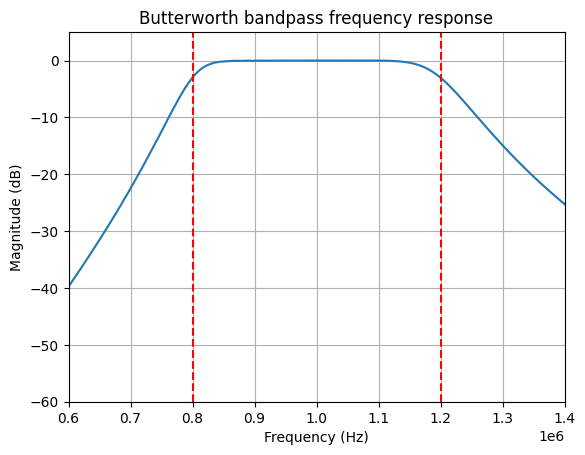

In [64]:
# Filtering

b, a = signal.butter(5, [0.8*f0, 1.2*f0], btype='bandpass', fs = fc)
w, H = signal.freqz(b, a, worN=16384, fs=fc)

plt.figure()
plt.plot(w, 20*np.log10(np.abs(H)+1e-12))
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude (dB)")
plt.xlim(0.6e6, 1.4e6)
plt.ylim(-60, 5)
plt.axvline(0.8*f0, linestyle='--', color='r')
plt.axvline(1.2*f0, linestyle='--', color='r')
plt.title("Butterworth bandpass frequency response")
plt.grid()
plt.show()


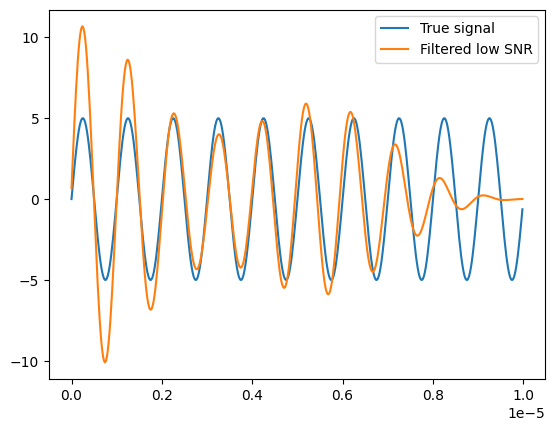

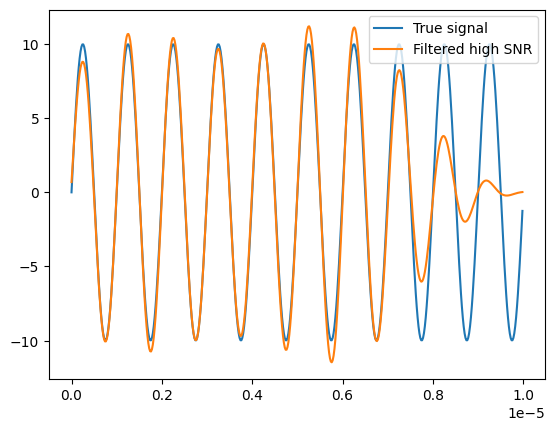

In [65]:
#Filtering low and high SNR signals
N = int(fc*tstop)
t = np.arange(N)/fc

y_lowSNR_filt = signal.filtfilt(b, a, y_notdominant)
y_highSNR_filt = signal.filtfilt(b, a, y_dominant)

plt.plot(t, sig_amp_low*y, label="True signal")
plt.plot(t, y_lowSNR_filt, label="Filtered low SNR")
plt.legend()
plt.show()

plt.plot(t, sig_amp_high*y, label="True signal")
plt.plot(t, y_highSNR_filt, label="Filtered high SNR")
plt.legend()
plt.show()